# Урок 4. Визуальный анализ данных
 ___

Описание данных:
id - unique identified for a house
dateDate - house was sold
pricePrice - is prediction target
bedroomsNumber - of Bedrooms/House
bathroomsNumber - of bathrooms/bedrooms
sqft_livingsquare - footage of the home
sqft_lotsquare - footage of the lot
floorsTotal - floors (levels) in house
waterfront - House which has a view to a waterfront
view - Has been viewed
condition - How good the condition is ( Overall )
grade - overall grade given to the housing unit, based on King County grading system
sqft_above - square footage of house apart from basement
sqft_basement - square footage of the basement
yr_built - Built Year
yr_renovated - Year when house was renovated
zipcode - zip
lat - Latitude coordinate
long - Longitude coordinate
sqft_living15 - The square footage of interior housing living space for the nearest 15 neighbors
sqft_lot15 - The square footage of the land lots of the nearest 15 neighbors

Блок импортов

In [1]:
import numpy as np
# База
import pandas as pd
import numpy as np

# Графика
import matplotlib.pyplot as plt
import seaborn as sns

## Условие 1: Задача 1
___
Постройте график
Назовите график
Сделайте именование оси x и оси y
Сделайте выводы
1.1. Скачать данные по ссылке https://www.kaggle.com/datasets/ionaskel/laptop-prices
1.2 Изучите стоимости недвижимости
1.3 Изучите распределение квадратуры жилой
1.4 Изучите распределение года постройки

In [2]:
# Считать данные с помощью pandas
kc_house_data = pd.read_csv('kc-house-data.csv', encoding='utf-8')

In [3]:
kc_house_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

<function matplotlib.pyplot.grid(visible=None, which='major', axis='both', **kwargs)>

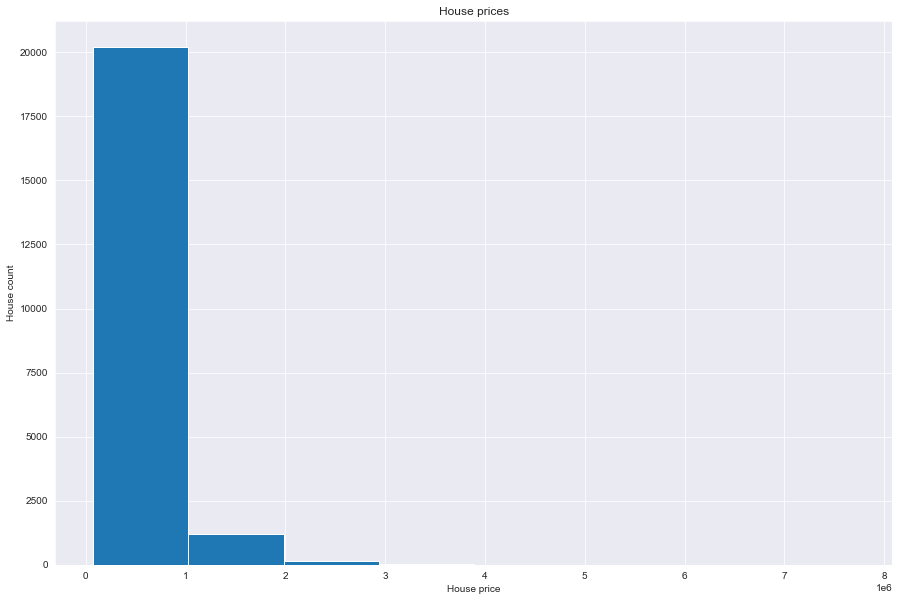

In [4]:
# 1.2 Изучите стоимости недвижимости

plt.figure(figsize=(15, 10))
plt.hist(kc_house_data['price'], bins=8)
plt.title('House prices')
plt.xlabel('House price')
plt.ylabel('House count')
plt.grid

### Выводы:
- визуально - более 90% домов стоят до 1000000.
- отсутствие видимой визуализации после значения цены 3е6 может говорить о выбросах (возможно на продажу выставлены супер-замки, либо это ошибки в данных)

<function matplotlib.pyplot.grid(visible=None, which='major', axis='both', **kwargs)>

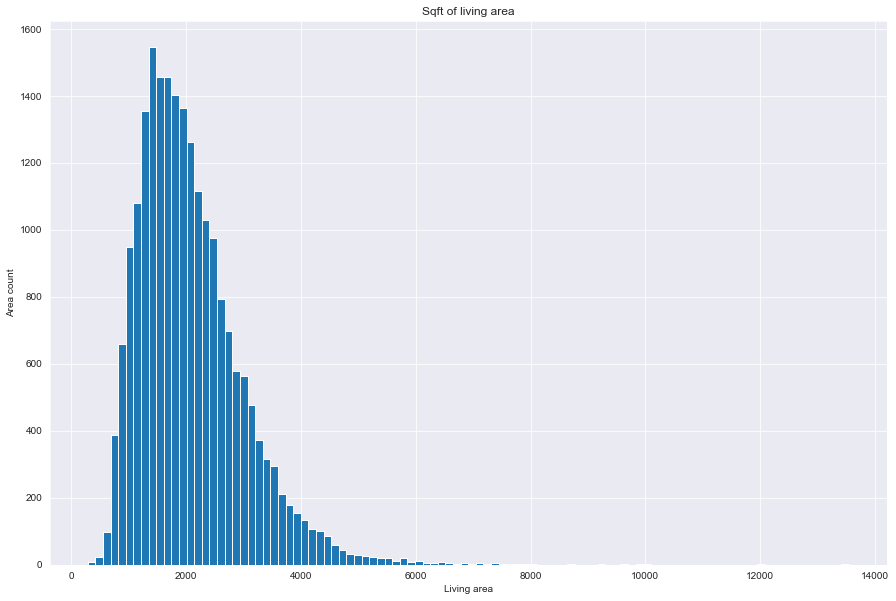

In [5]:
# 1.3 Изучите распределение квадратуры жилой площади

plt.figure(figsize=(15, 10))
plt.hist(kc_house_data['sqft_living'], bins=100)
# Ради интереса взяли bins побольше
plt.title('Sqft of living area')
plt.xlabel('Living area')
plt.ylabel('Area count')
plt.grid

### Выводы:
- большая часть домов имеет жилую площадь в пределах 1000-3500 квадратных футов
- отсутствие видимой визуализации после значения площади 8000 может говорить о выбросах (возможно на продажу выставлены супер-замки, либо это ошибки в данных)

In [6]:
# 1.4 Изучите распределение года постройки

kc_house_data['yr_built'].nunique()

116

Для анализа данного распределения можно взять количество bins, равным 116. Таким образом у нас будут данные по каждому году. Так же можно брать определенные временные отрезки, поделив количество уникальных значений на размер нужного нам отрезка. Например, если хотем рассмотреть 2-х годичные отрезки, то bins = 116 / 2 = 58

<function matplotlib.pyplot.grid(visible=None, which='major', axis='both', **kwargs)>

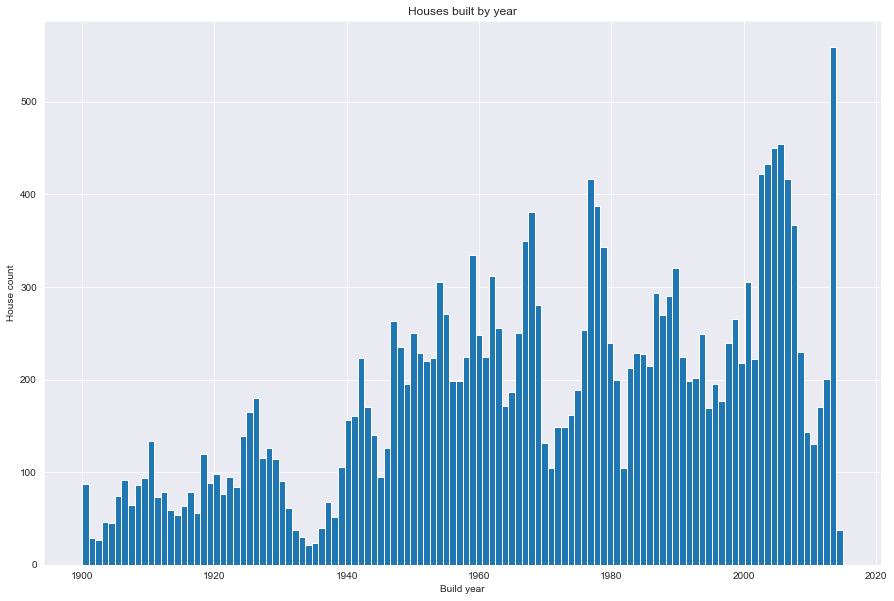

In [7]:
plt.figure(figsize=(15, 10))
plt.hist(kc_house_data['yr_built'], bins=116)
plt.title('Houses built by year')
plt.xlabel('Build year')
plt.ylabel('House count')
plt.grid

### Выводы:
- наблюдается явная тенденция увеличения количества построенных домов при увеличении года постройки.

## Условие 2: 2 задача
___
2.1 Изучите распределение домов от наличия вида на набережную
Постройте график
Сделайте выводы
2.2 Изучите распределение этажей домов
2.3 Изучите распределение состояния домов

В данном блоке мы работаем с категориальными признаками, в связи с чем данные предварительно лучше агрегировать. Так же посмотрим разные варианты визуализации.

In [8]:
# 2.1 Изучите распределение домов от наличия вида на набережную

# Подготовим данные

data = kc_house_data.groupby(['waterfront']).agg('count')['id']
data.index = ['no', 'yes']
data

no     21450
yes      163
Name: id, dtype: int64

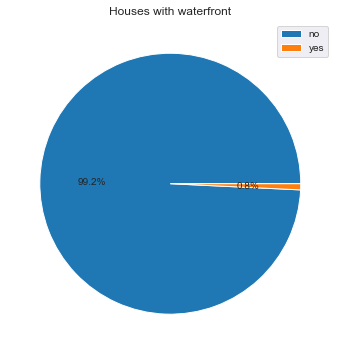

In [9]:
plt.figure(figsize=(6, 6))
plt.pie(data, autopct='%1.1f%%')
plt.title('Houses with waterfront')
plt.legend(data.index)

### Выводы:
- всего 0,8% домов имеют вид на набережную.

In [10]:
# 2.2 Изучите распределение этажей домов

# Подготовим данные

data = kc_house_data.groupby(['floors']).agg('count')['id']
data

floors
1.0    10680
1.5     1910
2.0     8241
2.5      161
3.0      613
3.5        8
Name: id, dtype: int64

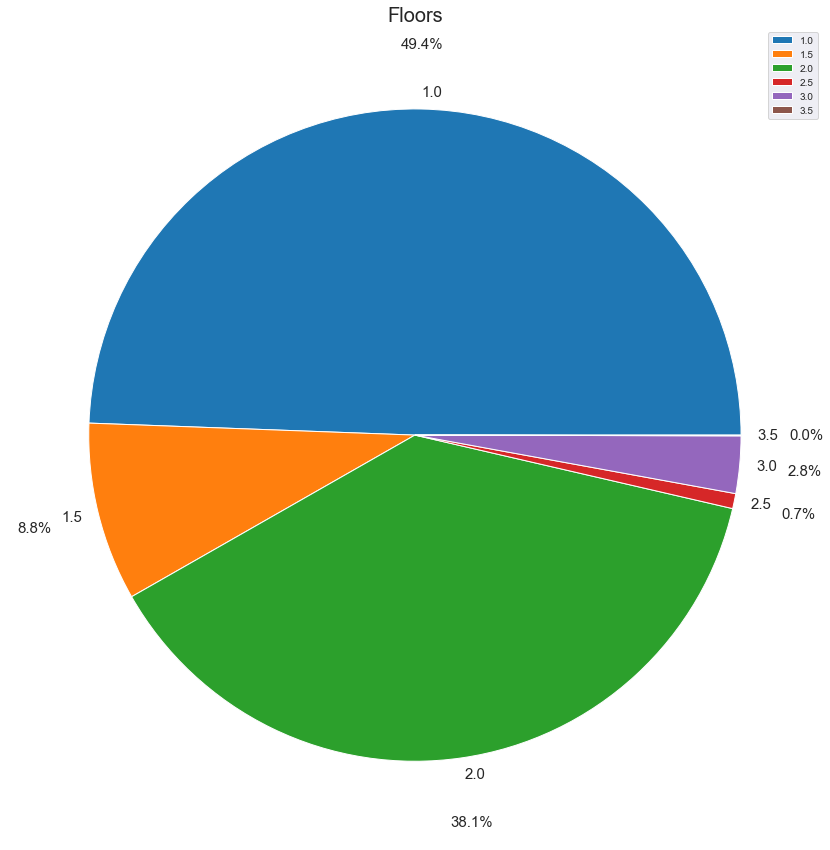

In [11]:
# И строим график:
textprops = {"fontsize":15}
plt.figure(figsize=(15, 15))
plt.pie(data, autopct='%1.1f%%', textprops = textprops, labels=data.index, pctdistance=1.2, labeldistance=1.05)
plt.title('Floors', fontsize = 20)
plt.legend(data.index)

### Выводы:
- более 95% домов имеет до 2-х этажей, включительно.

In [12]:
# 2.3 Изучите распределение состояния домов
# Для сравнения "наглядности" в этот раз попробуем другой тип графика.
# Подготовим данные:

data = kc_house_data.groupby(['condition']).agg('count')['id']
data

condition
1       30
2      172
3    14031
4     5679
5     1701
Name: id, dtype: int64

Text(0, 0.5, 'House count')

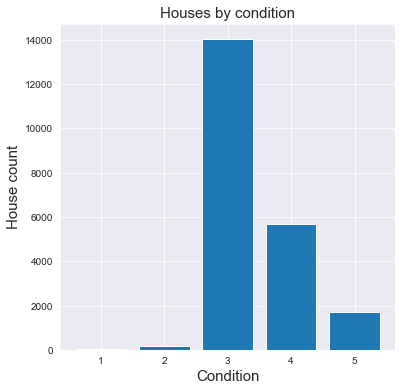

In [13]:
# И построим график:
plt.figure(figsize=(6, 6))
plt.bar(data.index, data.values)
plt.title('Houses by condition', fontsize=15)
plt.xlabel('Condition', fontsize=15)
plt.ylabel('House count', fontsize=15)

### Выводы:
- наибольшее количество домов в удовлетворительном состоянии
- совсем аварийных домов нет (очевидно из-за вовремя проводимых ремонтно-восстановительных работ)
- для некоторых видом анализа barplot нагляднее чем pie.

## Условие 3: 3 задача
___
Исследуйте, какие характеристики недвижимости влияют на стоимость недвижимости, с применением не менее 5 диаграмм из урока.
Анализ сделайте в формате storytelling: дополнить каждый график письменными выводами и наблюдениями.


## Зависимость стоимости от года постройки
___

In [14]:
year_price_data = kc_house_data.groupby(['yr_built'])['price'].agg('mean')
year_price_data

yr_built
1900    581387.206897
1901    556935.931034
1902    673007.407407
1903    480958.195652
1904    583756.644444
            ...      
2011    544522.000000
2012    527447.335294
2013    678545.452736
2014    683681.754919
2015    759785.157895
Name: price, Length: 116, dtype: float64

Text(0, 0.5, 'House mean price')

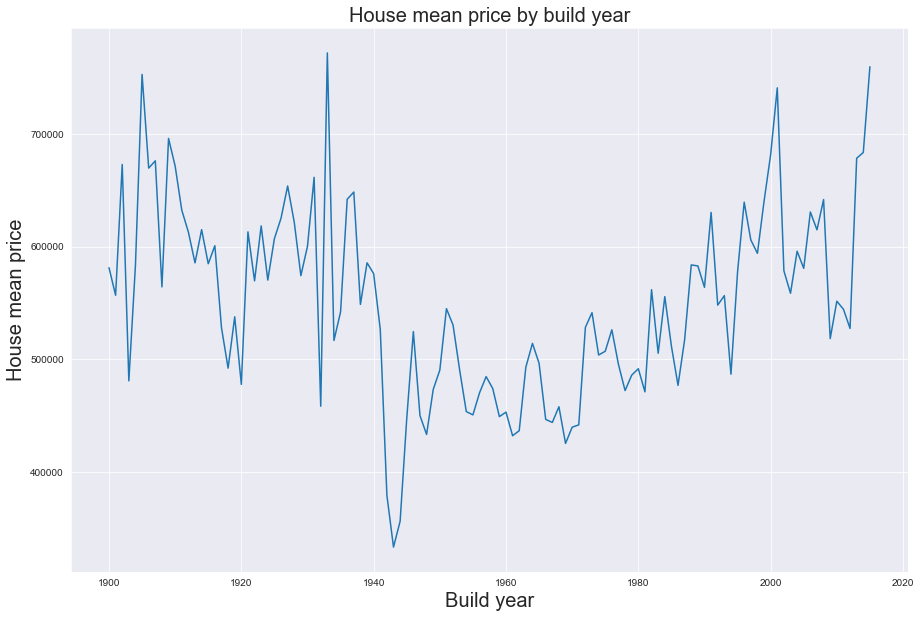

In [15]:
plt.figure(figsize=(15, 10))
plt.plot(year_price_data.index, year_price_data.values)
plt.title('House mean price by build year', fontsize=20)
plt.xlabel('Build year', fontsize=20)
plt.ylabel('House mean price', fontsize=20)

### Выводы:
- до 1940-х годов средняя цена имеет линейный тренд ("скачет" вокруг 600000).
- в 40-х годах произошло резкое и значительное проседание средней стоимости зданий (очевидно связано с событиями тех лет)
- после 40-х годов наблюдаем линейный рост тренда средней цены зданий. По состоянию на предоставленные данные стоимость вышла на уровень до 40-х годов.

### Зависимость стоимости от жилой площади
___
p.s.: жилая площадь - непрерывный признак, поэтому предварительное агрегирование данных не требуется.

Text(0, 0.5, 'House price')

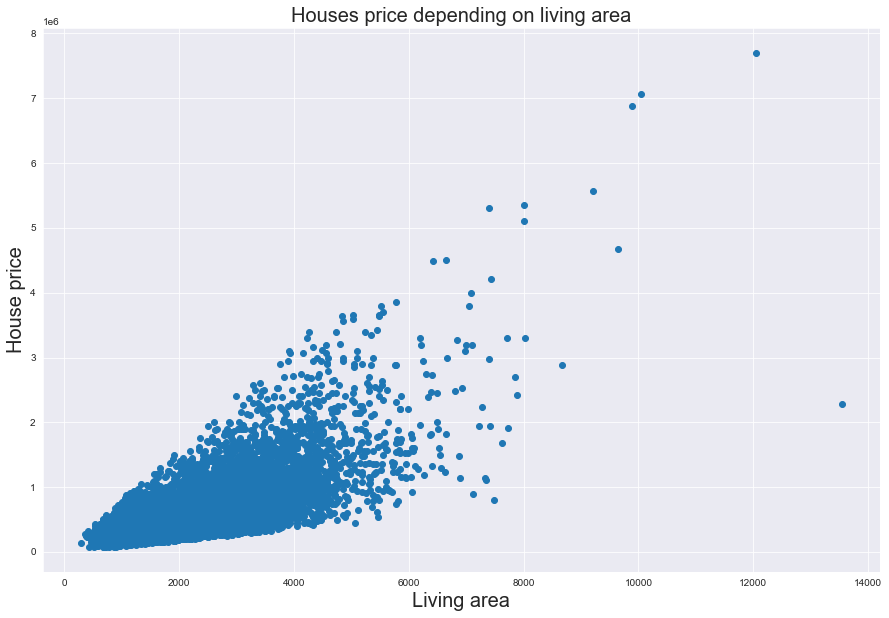

In [16]:
plt.figure(figsize=(15, 10))
plt.scatter(kc_house_data['sqft_living'], kc_house_data['price'])
plt.title('Houses price depending on living area', fontsize=20)
plt.xlabel('Living area', fontsize=20)
plt.ylabel('House price', fontsize=20)

### Выводы:
- логично, что с увеличением жилой площади возрастает и стоимость домов
- очевидно, скажем так, "веерность" разброса при увеличении жилой площади продиктована тем, что чем больше площадь, тем больше может появиться дополнительных признаков, влияющих на стоимость.

### Зависимость средней стоимости от количества спален
___

In [17]:
bedrooms_price_data = kc_house_data.groupby('bedrooms')['price'].agg('mean')
bedrooms_price_data

bedrooms
0     4.095038e+05
1     3.176429e+05
2     4.013727e+05
3     4.662321e+05
4     6.354195e+05
5     7.865998e+05
6     8.255206e+05
7     9.511847e+05
8     1.105077e+06
9     8.939998e+05
10    8.193333e+05
11    5.200000e+05
33    6.400000e+05
Name: price, dtype: float64

Text(0, 0.5, 'Mean house price')

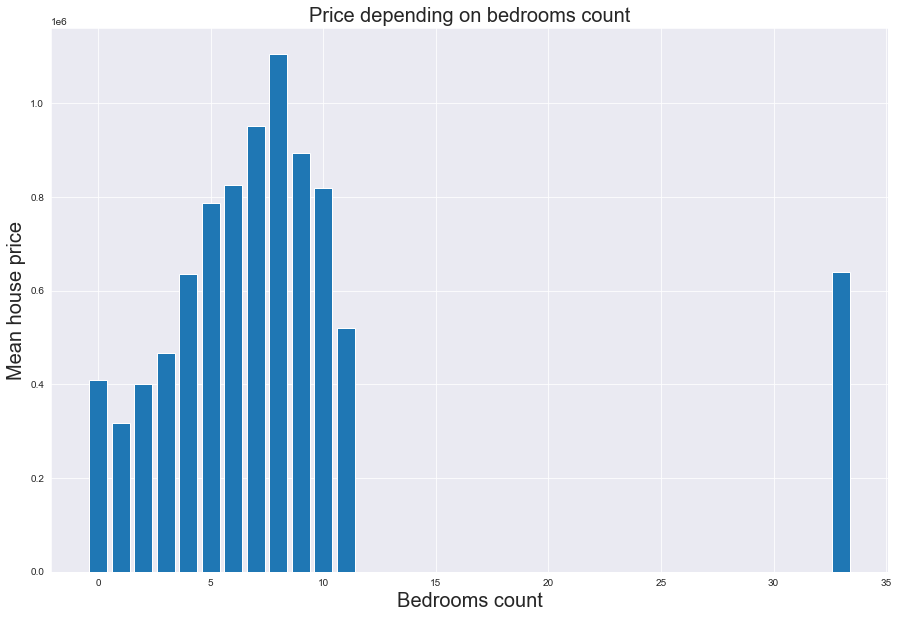

In [18]:
plt.figure(figsize=(15, 10))
plt.bar(bedrooms_price_data.index, bedrooms_price_data.values)
plt.title('Price depending on bedrooms count', fontsize=20)
plt.xlabel('Bedrooms count', fontsize=20)
plt.ylabel('Mean house price', fontsize=20)

### Выводы:
- ожидался полностью линейный рост цены с ростом количества спален, но нет.
- очевидно значительное влияние на цену других признаком для некоторых случаев.

### Зависимость средней стоимости от оценки здания
___

In [19]:
grade_price_data = kc_house_data.groupby('grade')['price'].agg('mean')
grade_price_data

grade
1     1.420000e+05
3     2.056667e+05
4     2.143810e+05
5     2.485240e+05
6     3.019196e+05
7     4.025903e+05
8     5.428528e+05
9     7.735132e+05
10    1.071771e+06
11    1.496842e+06
12    2.191222e+06
13    3.709615e+06
Name: price, dtype: float64

Text(0, 0.5, 'Mean house price')

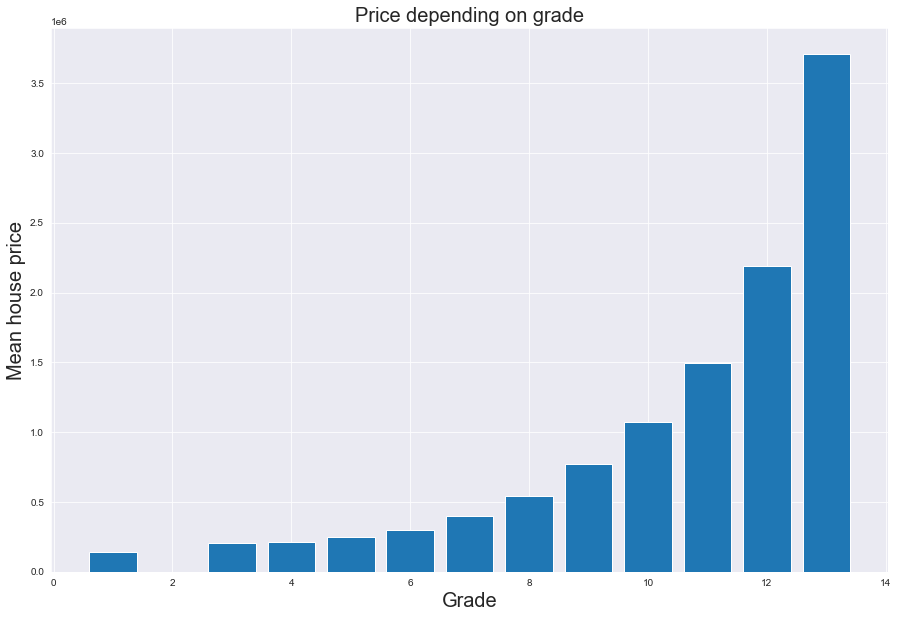

In [20]:
plt.figure(figsize=(15, 10))
plt.bar(grade_price_data.index, grade_price_data.values)
plt.title('Price depending on grade', fontsize=20)
plt.xlabel('Grade', fontsize=20)
plt.ylabel('Mean house price', fontsize=20)

### Выводы:
- а вот тут все максимально очевидно: чем выше оценка - тем выше стоимость здания
- данный признак сам по себе может быть таргетом для предсказания, при обучении модели ML. В связи с чем при обучении регрессионной модели (предсказываем цену) - от признака "grade" стоит избавиться. И наоборот, при обучении модели классификации, стоит избавиться от признака "price". (возможно...)

### Зависимость стоимости дома от его состояния
___

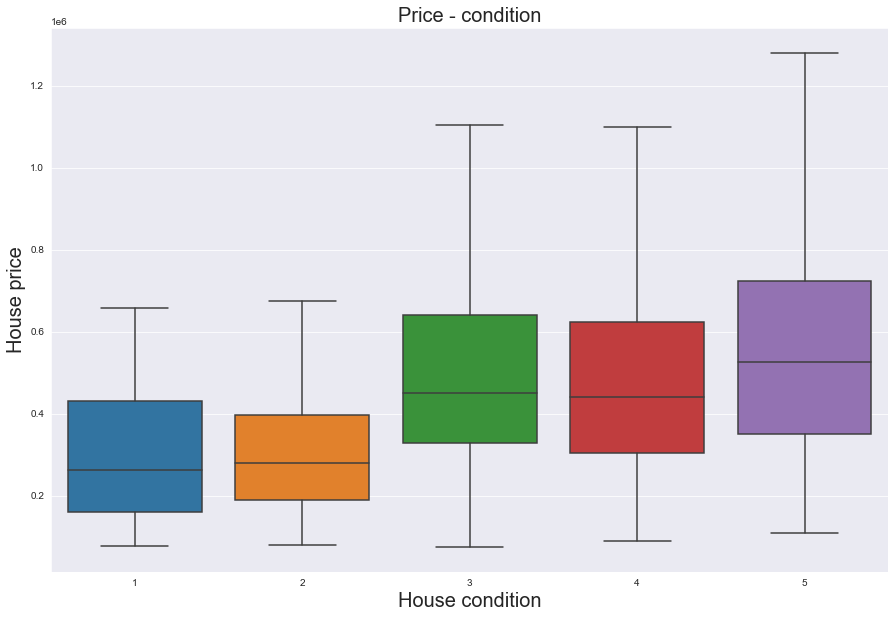

In [21]:
plt.figure(figsize=(15,10))

sns.boxplot(data=kc_house_data, x='condition', y='price' , whis=1.5, showfliers=False)

plt.title('Price - condition', fontsize=20)
plt.xlabel('House condition', fontsize=20)
plt.ylabel('House price', fontsize=20)
plt.show()

### Выводы:
- ну тут тоже все логично: с ростом качества дома - растет его цена
- интересно что явно выделяются две группы. Первая: condition равен 1 и 2, вторая - 3,4 и 5. Видимо мое предположение выше было верно и 1 и 2 - это аварийное и предаварийной состояние, соответственно. Что требует, соответственно, дополнительных вложений в здание после покупки.
- вторая интересность - внутри своих групп (из предыдущего пункта) разбросы по квантилям не то чтобы сильно отличаются.

### Вычислим и визуализируем корреляционную матрицу
___

In [22]:
corr_matrix = kc_house_data.corr()
corr_matrix = np.round_(corr_matrix, 1)
corr_matrix[np.abs(corr_matrix) < 0.5] = 0

<AxesSubplot:>

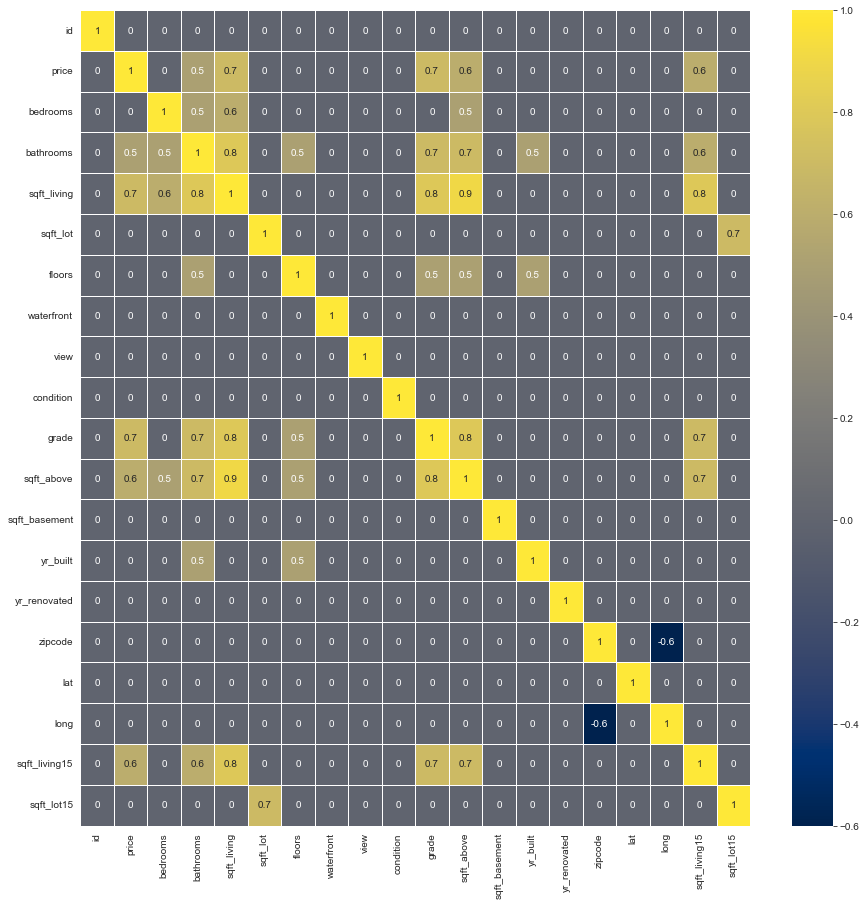

In [26]:
plt.figure(figsize=(15,15))
sns.heatmap(corr_matrix, annot=True, linewidths=0.5, cmap='cividis')

### Выводы:
- ну тут особо нечего сказать: после фильтра действительно остались самый влиятельные, на первый взгляд, признаки.
- странным является то что признак grade (который по сути является дискретным отражением стоимости дома) не самый влиятельный (много признаков со значением 0.8 и даже 0.9 есть).
- так же странно что в заданный порог не попал признак condition